# 1. Importing Libraries

In [41]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import random
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')


# 2. Importing Dataset

In [42]:
# Importing data:
data = pd.read_csv('../Datasets/raw_datasets/data.csv', index_col='id')
submission  = pd.read_csv('../Datasets/raw_datasets/sample_submission.csv')

# Making a deep copy of the data
data_copy = data.copy(deep = True)

# 3. EDA

## 3.1 Meet and Greet with the Data:

In [43]:
# Printing the first few entries of datasets.
print("Dataset Sample: \n\n")
display(data_copy.head())
print("\n\n Submission Dataset Sample: \n\n")
display(submission.head())

Dataset Sample: 




,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263




 Submission Dataset Sample: 




,Id,Predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [44]:
# A brief overview of data
print("\n\n A brief overview of Training Dataset:\n")
print(data_copy.info())



 A brief overview of Training Dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 98000 entries, 0 to 97999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_00    98000 non-null  float64
 1   f_01    98000 non-null  float64
 2   f_02    98000 non-null  float64
 3   f_03    98000 non-null  float64
 4   f_04    98000 non-null  float64
 5   f_05    98000 non-null  float64
 6   f_06    98000 non-null  float64
 7   f_07    98000 non-null  int64  
 8   f_08    98000 non-null  int64  
 9   f_09    98000 non-null  int64  
 10  f_10    98000 non-null  int64  
 11  f_11    98000 non-null  int64  
 12  f_12    98000 non-null  int64  
 13  f_13    98000 non-null  int64  
 14  f_14    98000 non-null  float64
 15  f_15    98000 non-null  float64
 16  f_16    98000 non-null  float64
 17  f_17    98000 non-null  float64
 18  f_18    98000 non-null  float64
 19  f_19    98000 non-null  float64
 20  f_20    98000 non-null  float64
 21

In [45]:
# A Brief Statistical Overview:
display("\n\n A brief statistical overview of Training Dataset:\n\n", data_copy.describe(include='all').T)

'\n\n A brief statistical overview of Training Dataset:\n\n'

,count,mean,std,min,25%,50%,75%,max
f_00,98000.0,0.001220,1.002801,-4.732235,-0.675226,0.002022,0.677271,4.490521
f_01,98000.0,0.005580,1.000742,-4.202795,-0.670985,0.006650,0.677746,4.324974
f_02,98000.0,-0.001042,1.001373,-4.377021,-0.672779,-0.000324,0.677086,4.560247
f_03,98000.0,-0.000700,1.000422,-4.010826,-0.672540,-0.003185,0.672097,4.399373
f_04,98000.0,-0.003522,1.003061,-4.535903,-0.682510,-0.003307,0.677589,4.050549
f_05,98000.0,-0.001612,1.000532,-4.300767,-0.675066,0.001024,0.673344,4.710316
f_06,98000.0,-0.003042,0.997434,-4.894525,-0.680421,-0.002053,0.668112,3.998595
f_07,98000.0,5.545918,3.691840,0.000000,3.000000,5.000000,8.000000,32.000000
f_08,98000.0,6.763061,4.152348,0.000000,4.000000,6.000000,9.000000,30.000000
f_09,98000.0,8.193163,5.904919,0.000000,4.000000,7.000000,11.000000,44.000000


In [46]:
# Finding Duplicates
print(f"Duplicates in training dataset: {data_copy.duplicated().sum()}, ({np.round(100*data_copy.duplicated().sum()/len(data_copy),1)}%)")

Duplicates in training dataset: 0, (0.0%)


In [47]:
# Finding Missing Values
print("missing/null values across columns:\n")

print(data_copy.isna().sum())

missing/null values across columns:

f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
dtype: int64


## 3.2 Discrete features (Integer Columns) Distribution Analysis:


Interger Columns (Number of Unique Categories)

  Features  Unique
0     f_07      32
1     f_08      29
2     f_09      45
3     f_10      37
4     f_11      29
5     f_12      39
6     f_13      30


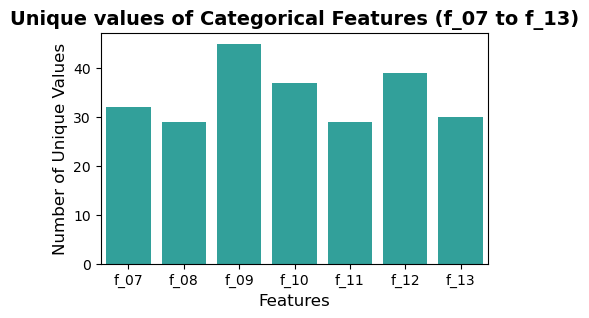

In [48]:
# integer data
int_data = data_copy.select_dtypes(int)

# interger data column names as a list
int_data_cols = int_data.columns.to_list()

# Number of Unique Interger Columns Categories:
int_cols_nunique = int_data.nunique().reset_index()
int_cols_nunique.columns = ['Features', 'Unique']

print("\nInterger Columns (Number of Unique Categories)\n")
print(int_cols_nunique)

plt.figure(figsize=(5,3))
sns.barplot(x='Features', y='Unique', data=int_cols_nunique, color='lightseagreen')
plt.title('Unique values of Categorical Features (f_07 to f_13)', fontsize=14, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Number of Unique Values', fontsize=12)
plt.xticks()
plt.show()



Integer Columns (Unique Categories and their Value Counts Distribution)

f_07: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 32]
f_08: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 30]
f_09: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
f_10: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
f_11: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
f_12: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
f_13: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 30]


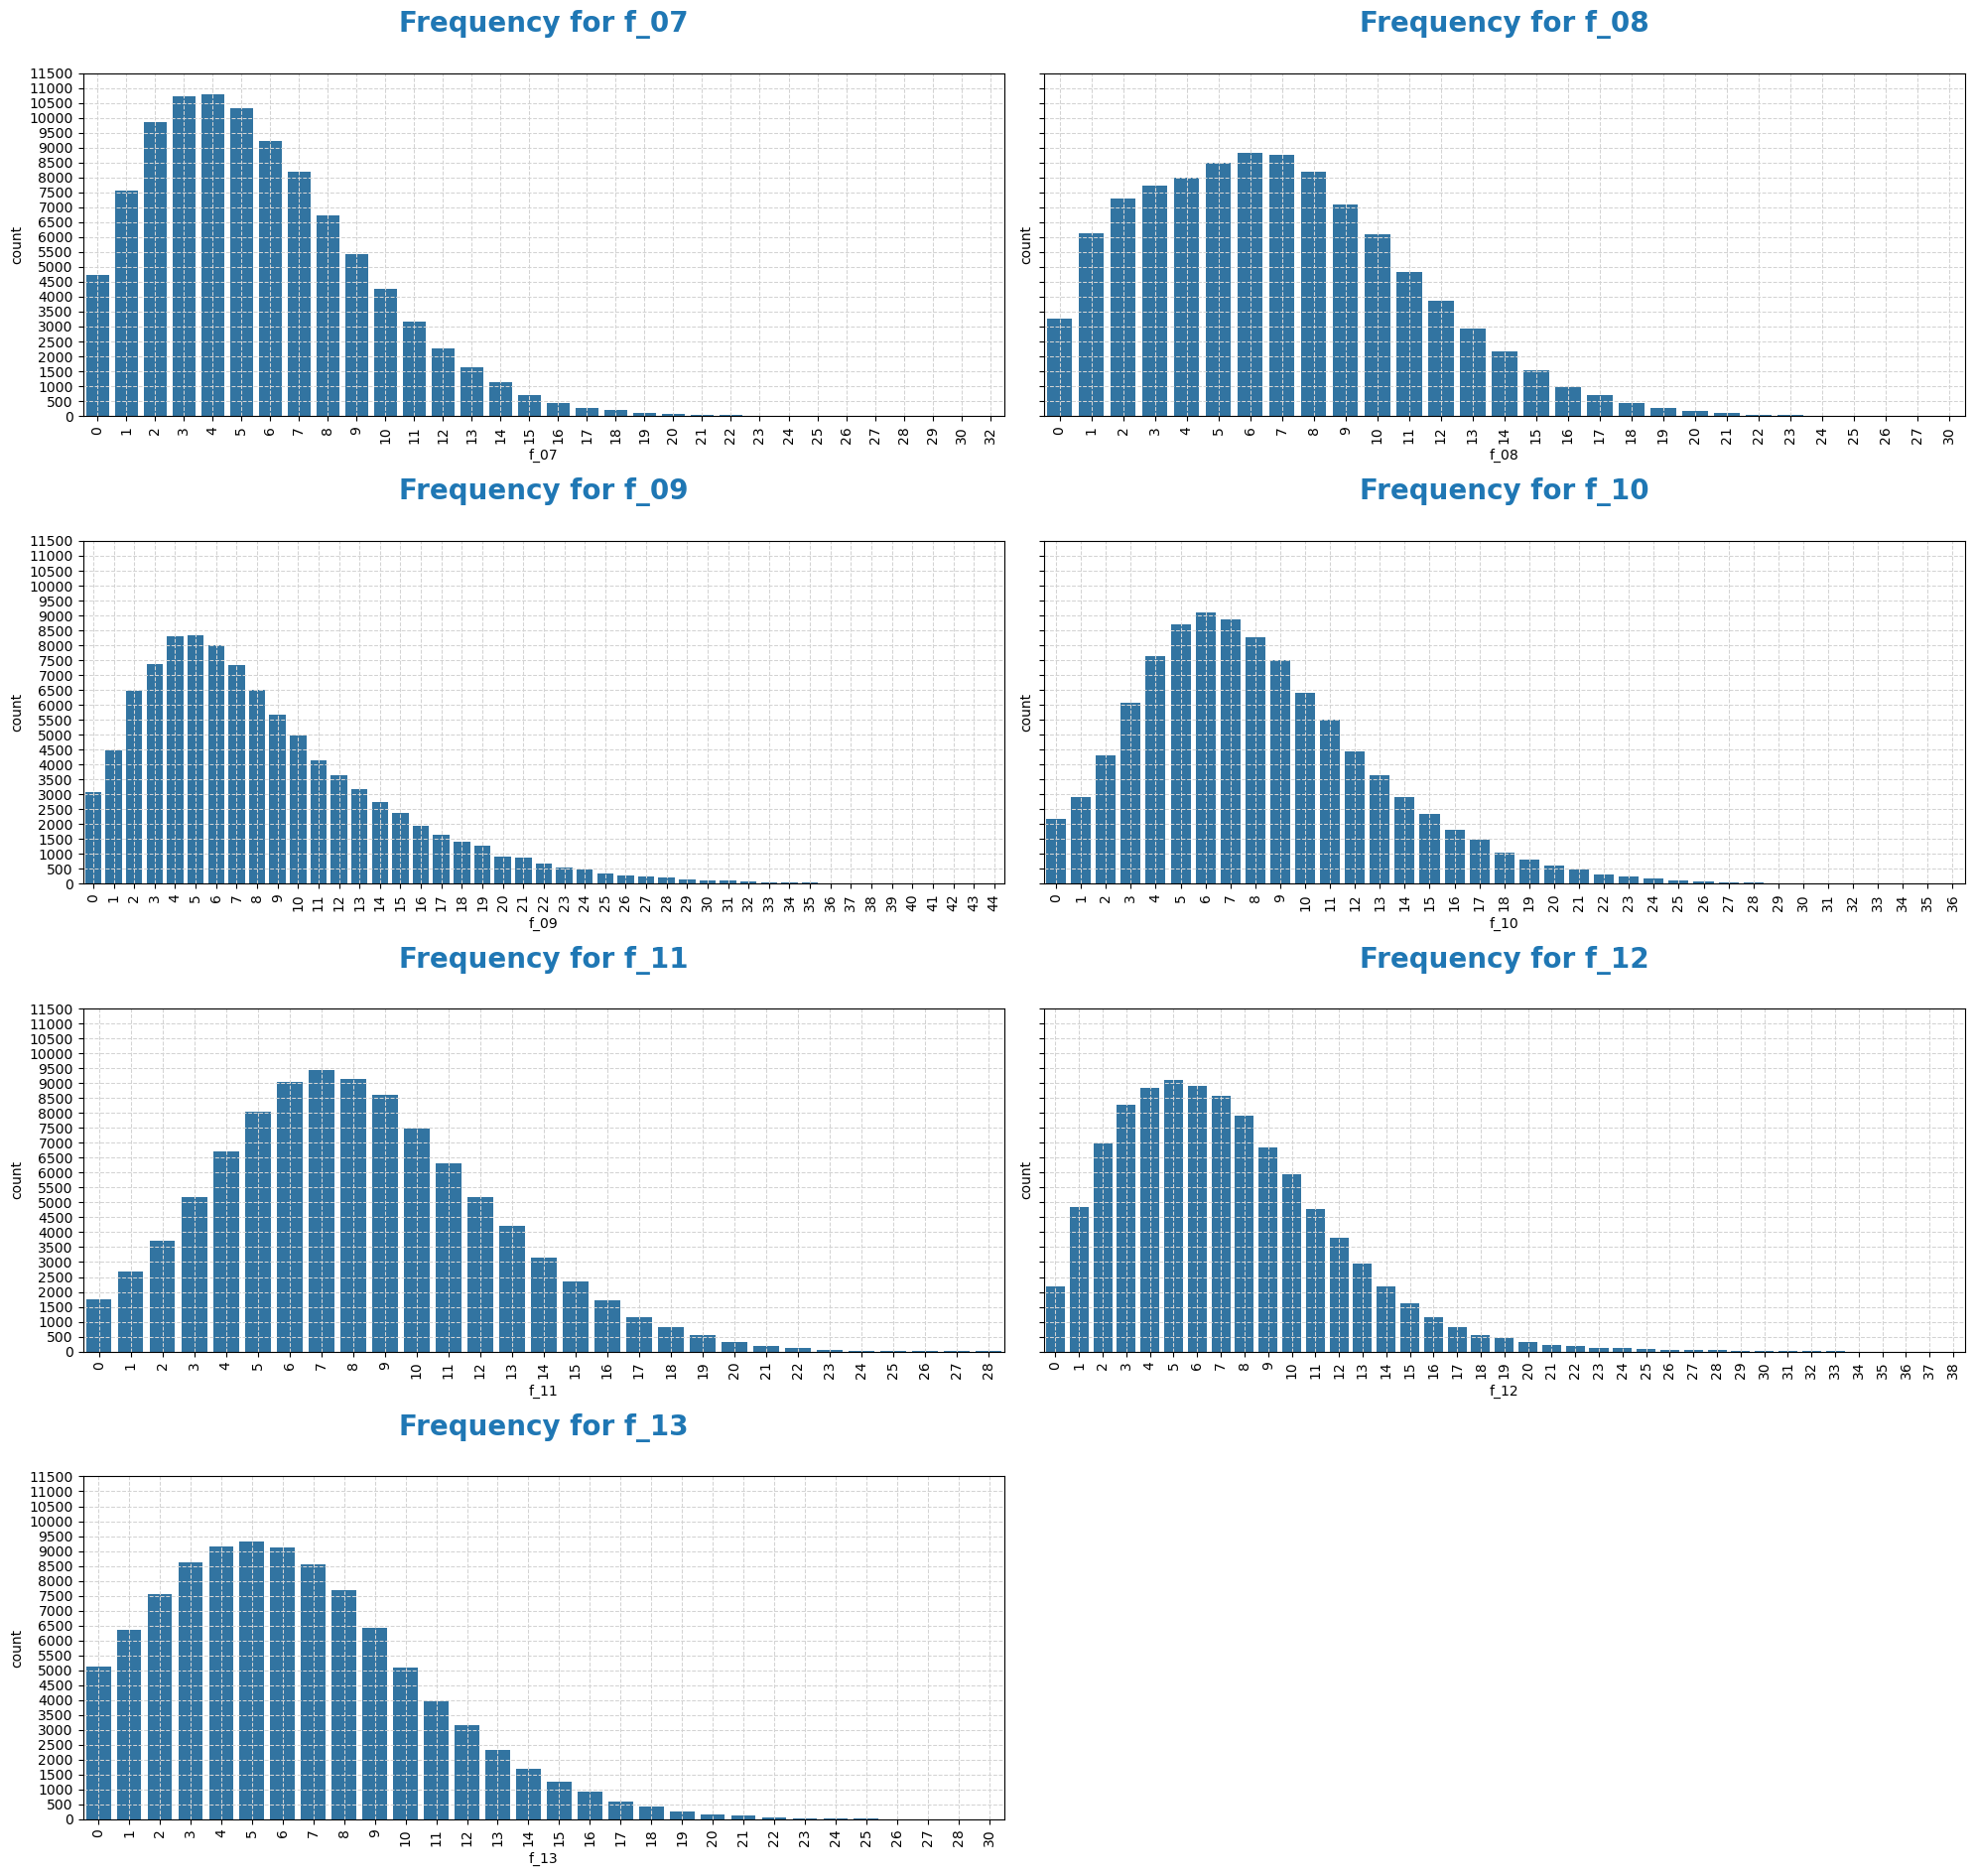

In [49]:
print("\nInteger Columns (Unique Categories and their Value Counts Distribution)\n")

ncols = 2
nrows = int(np.ceil(len(int_data_cols) / ncols))

fig, ax = plt.subplots(nrows, ncols, figsize=(20,19), sharey=True)

# Flattening the axes array for easy indexing
ax = ax.flatten()

# Iterate over each integer column and print the number of unique values
for i, col in enumerate(int_data_cols):
    unique_values = np.sort(int_data[col].unique())
    print(f"{col}: {unique_values}")

    # Plotting with Seaborn
    sns.countplot(x=col, data=int_data, color='tab:blue', order=unique_values, ax=ax[i])
    ax[i].set_title(f"Frequency for {col}\n", fontsize=20, fontweight='bold', color='tab:blue')
    ax[i].grid(visible=True, which='both', color='lightgrey', linestyle='--', linewidth=0.75)
    ax[i].set_yticks(range(0, 12000, 500))
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)

# Remove any unused subplots if the number of integer columns is less than the grid size
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

## 3.3 Continuous features (Float Columns) Distribution Analysis:

In [50]:
# float data
float_data = data_copy.select_dtypes(float)
display(float_data.head())

# float data column names as a list
float_data_cols = float_data.columns.to_list()
display(float_data_cols)


,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_14,f_15,f_16,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,-0.469819,0.358126,1.068105,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,0.591035,-0.396915,0.145834,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,-0.679875,0.469326,0.349843,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,-0.389456,0.626762,-1.074543,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,-0.120743,-0.615578,-1.064359,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


['f_00',
 'f_01',
 'f_02',
 'f_03',
 'f_04',
 'f_05',
 'f_06',
 'f_14',
 'f_15',
 'f_16',
 'f_17',
 'f_18',
 'f_19',
 'f_20',
 'f_21',
 'f_22',
 'f_23',
 'f_24',
 'f_25',
 'f_26',
 'f_27',
 'f_28']


Float Columns (Continuous Feature Distribution)



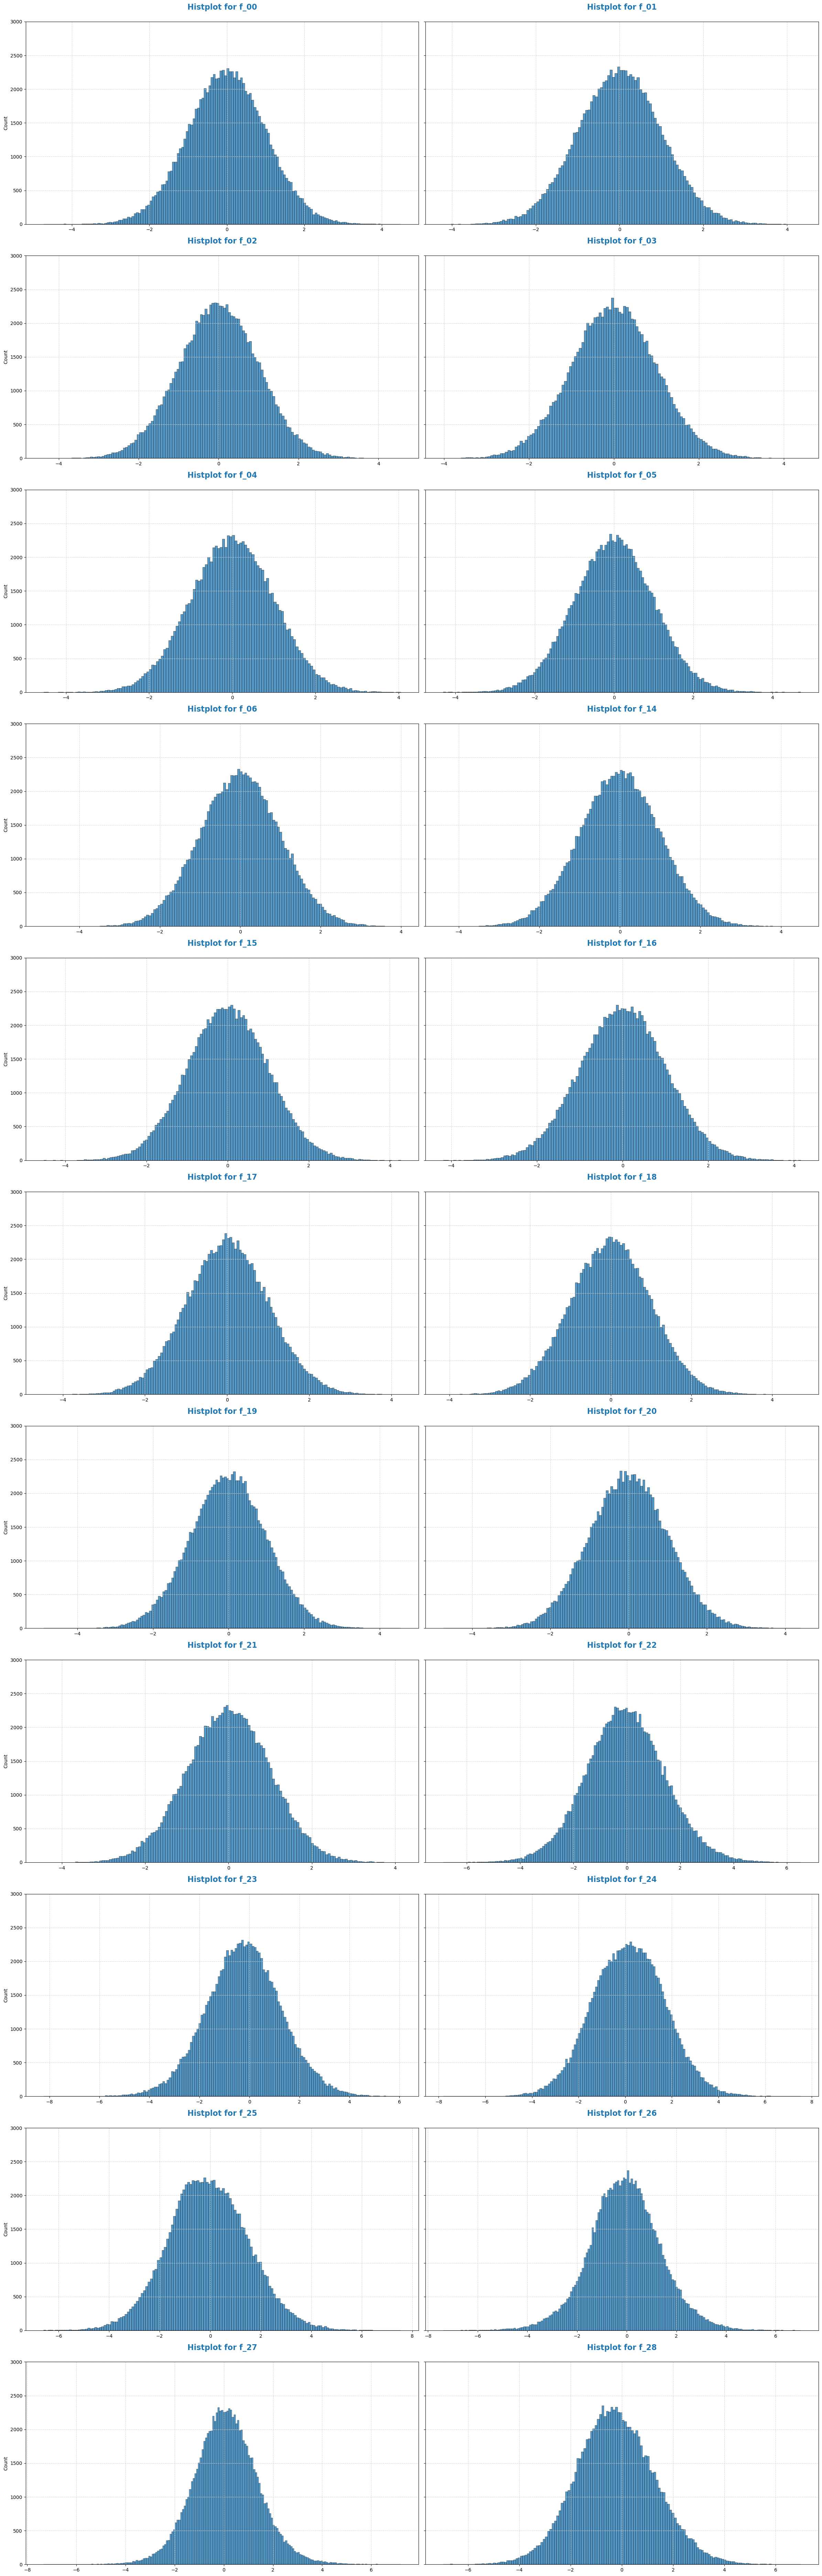

In [51]:
print("\nFloat Columns (Continuous Feature Distribution)\n")

ncols = 2
nrows = int(np.ceil(len(float_data_cols) / ncols))

fig, ax = plt.subplots(nrows, ncols, figsize=(24, 75), sharey=True)

# Flattening the axes array for easy indexing
ax = ax.flatten()

for i, col in enumerate(float_data_cols):

    # Plotting with Seaborn
    sns.histplot(data=float_data, x=col, color='tab:blue', ax=ax[i])
    ax[i].set_title(f"Histplot for {col}\n", fontsize=16, fontweight='bold', color='tab:blue')
    ax[i].set(xlabel='')
    ax[i].grid(visible=True, which='both', color='lightgrey', linestyle='--', linewidth=0.75)
    ax[i].set_yticks(range(0, 3001, 500))

# Remove any unused subplots if the number of float columns is less than the grid size
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

fig.tight_layout()
plt.show()

## 3.4 KDE Plots (To Better Visualize All Features Distributions):


KDE Plots for All Features



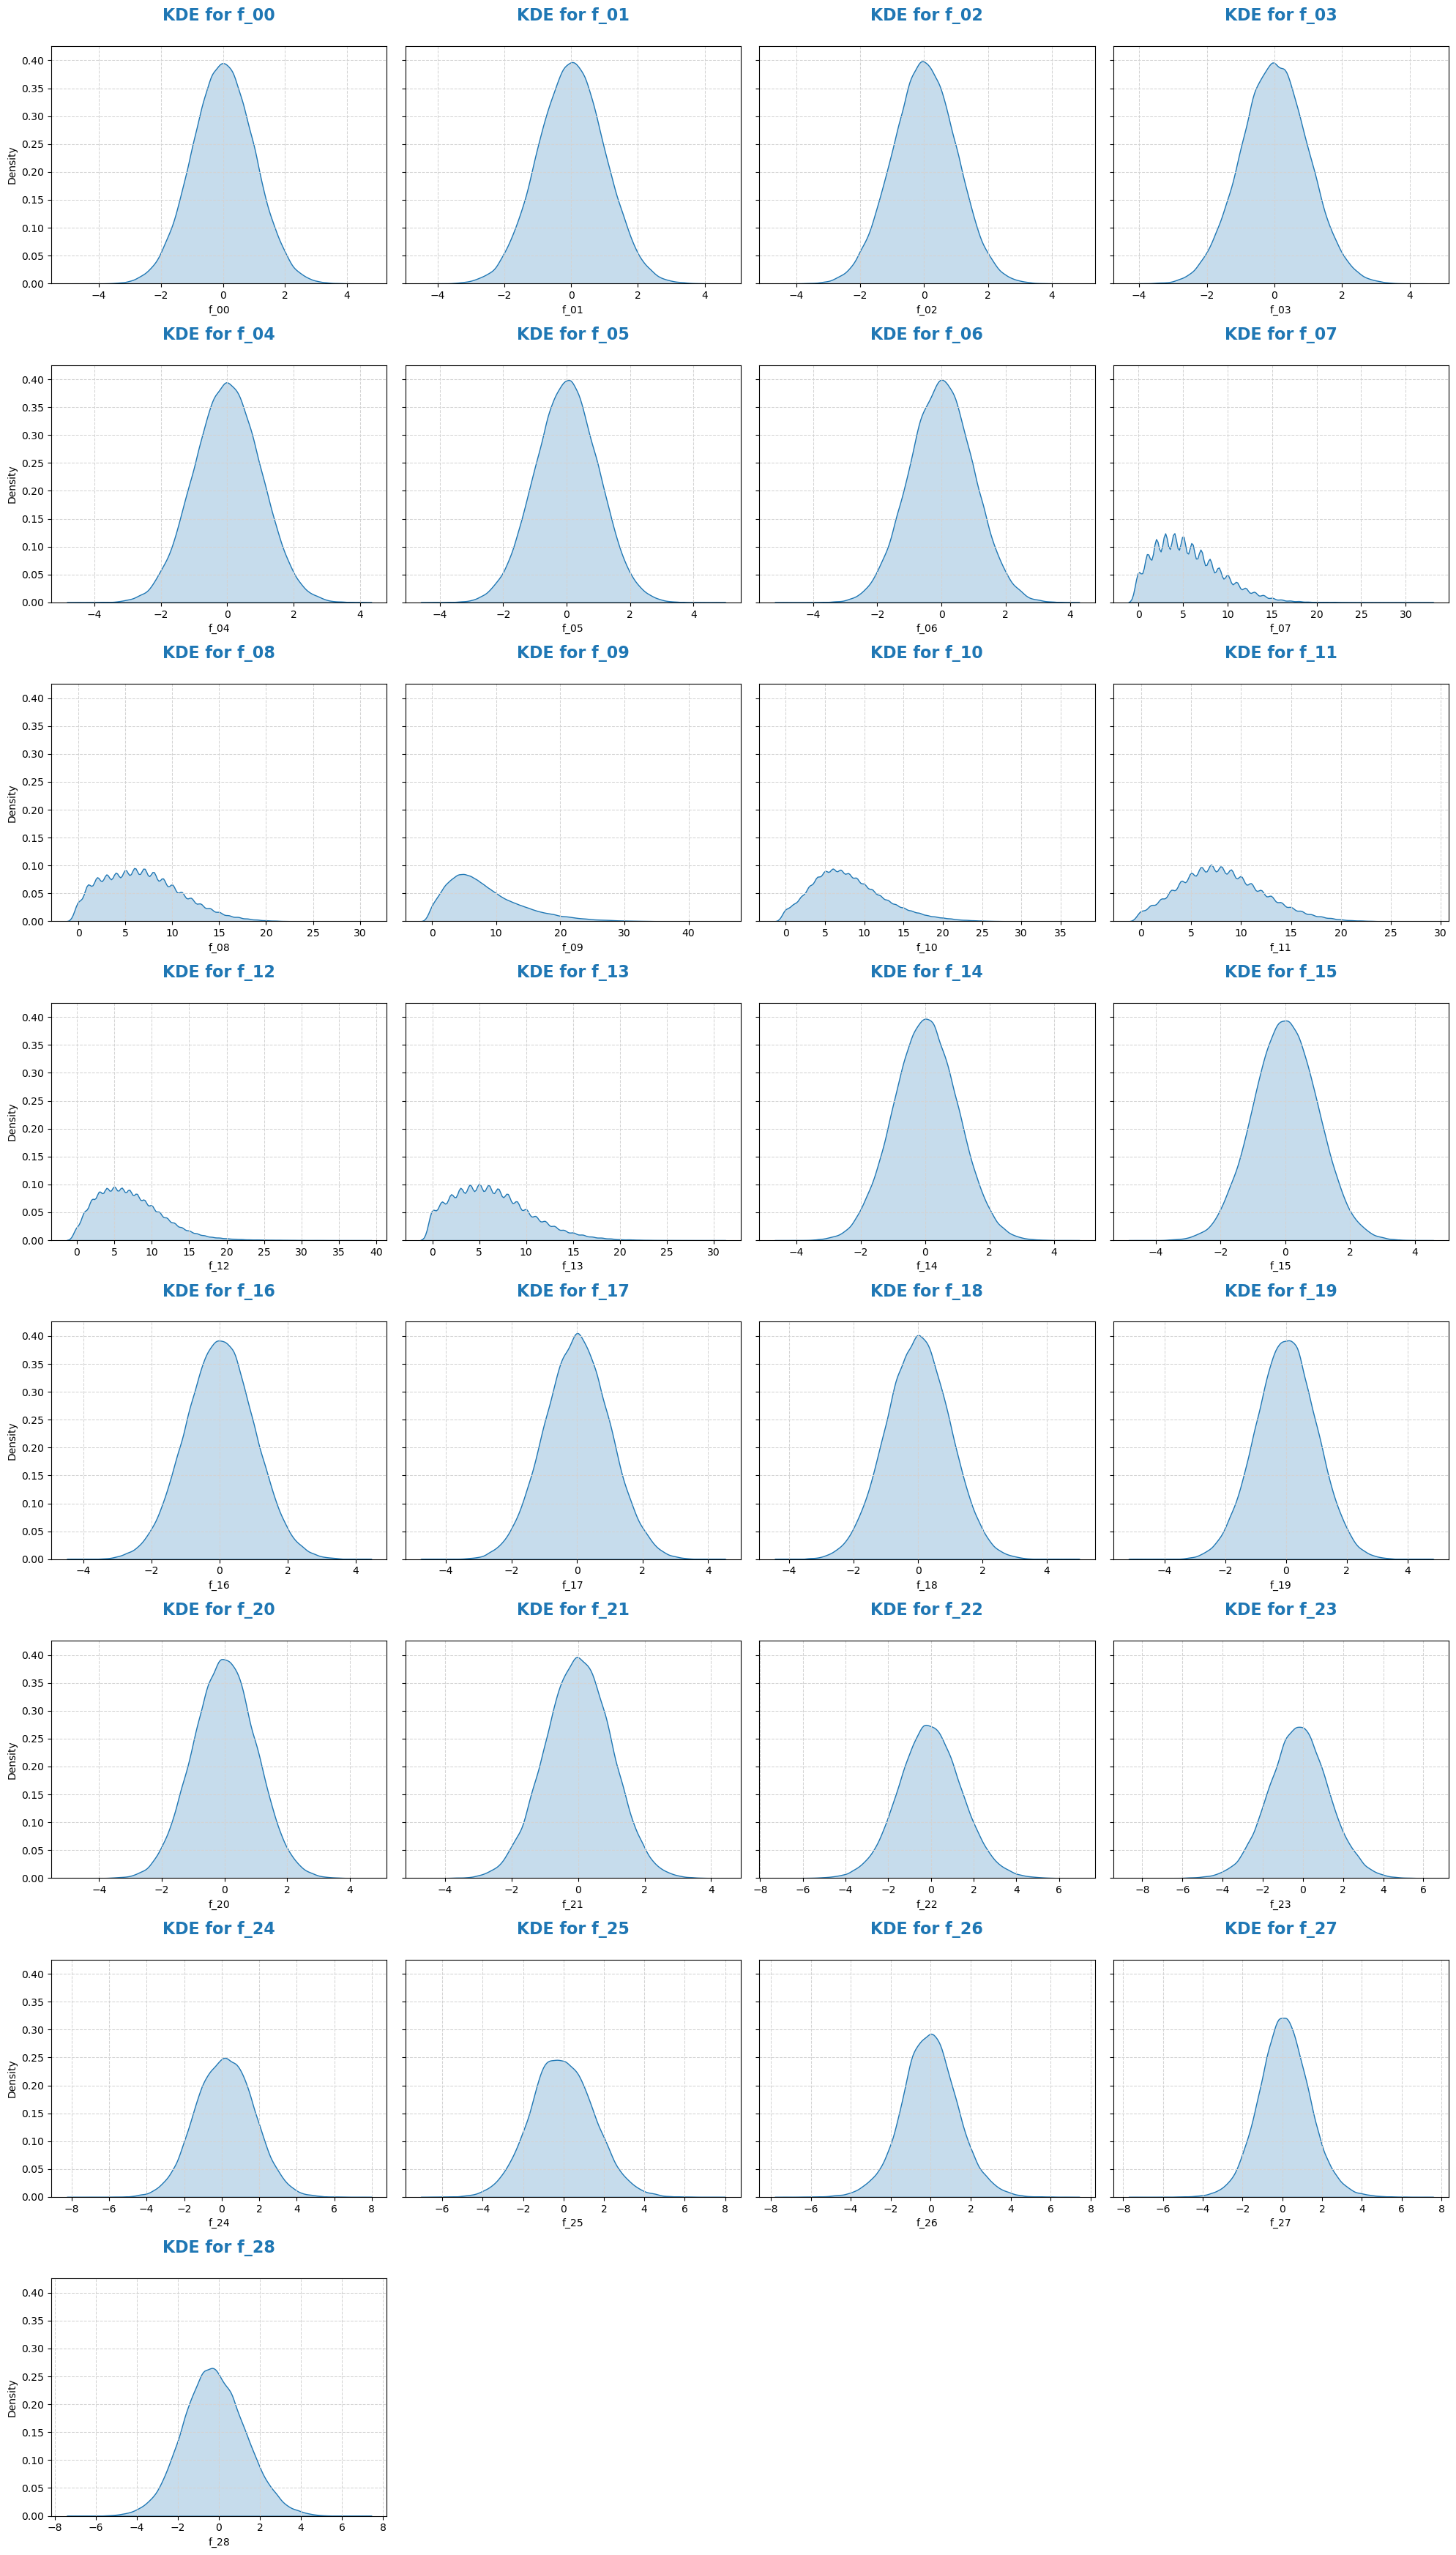

In [54]:
# Plot KDE for all features
print("\nKDE Plots for All Features\n")

# data_copy column names as a list
data_copy_cols_list = data_copy.columns.to_list()

# Determine the number of columns and rows for subplot grid
ncols = 4
nrows = int(np.ceil(len(data_copy_cols_list) / ncols))

fig, ax = plt.subplots(nrows, ncols, figsize=(20, 35), sharey=True)

# Flattening the axes array for easy indexing
ax = ax.flatten()

for i, col in enumerate(data_copy_cols_list):
    # Plotting KDE with Seaborn
    sns.kdeplot(data=data_copy, x=col, color='tab:blue', fill=True, ax=ax[i])
    ax[i].set_title(f"KDE for {col}\n", fontsize=16, fontweight='bold', color='tab:blue')
    ax[i].grid(visible=True, which='both', color='lightgrey', linestyle='--', linewidth=0.75)

# Remove any unused subplots if the number of columns is less than the grid size
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

fig.tight_layout()
plt.show()

## 3.5 Correlation Analysis:

In pandas, the .corr() method computes pairwise correlation of columns by following methods:

- **pearson** (default method): standard correlation coefficient. It computes the linear correlation between two variables.
- **kendall** : Kendall Tau correlation coefficient. It's useful when data is ordinal or not normally distributed.
- **spearman** : Spearman rank correlation. It's often used when dealing with small sample sizes.

## 3.6 Insights and Hypotheses from Preliminary Data Exploration:

### 3.6.1 Insights:

**Initial Data Exploration shows that:**<br> <br>
**Discreate features:**
- There are 7 discrete features (f_07 to f_13)
- All discreate features exhibits non-negative values.<br>

**Continuous Features:**
- There are 22 continuous features (f_00 to f_06 and f_14 to f_28)<br><br>
- Features f_00 to f_06 and f_14 to f_21 are characterized by values typically lying between -5 and +5
- For features f_00 to f_06 and f_14 to f_21, the mean values are around 0 and the standard deviation values are around 1 <br> <br>
- Features f_22 to f_28 exhibit values typically ranging between -8 and +8
- For features f_22 to f_28, the mean values are around 0 and the standard deviation values are around 1.5

**Initial Data Exploration along with KDE plots and Discrete Features Distribution Analysis shows that:**

- The distributions of these discrete features (f_07 to f_13) appear similar.
- Possibly these distributions follow a **Poisson distribution** due to their **Discrete Nature** and **Right Skewness**.

**Initial Data Exploration along with KDE plots and Continuous Features Distribution Analysis shows that:**

- The distributions of these continuous features (f_00 to f_06 and f_14 to f_28) appear similar.<br>
Specifically,
- The distribution of features f_00 to f_06 and f_14 to f_21 appear to be approximately **Gaussian(Normal) distribution**, with **mean values around 0** and **standard deviation values around 1**
- The distribution of features f_22 to f_28 also appear to be approximately **Gaussian(Normal) distribution**, but with **mean values around 0** and **standard deviation values around 1.5**

### 3.6.2 Hypothesis:

- Continuous Features (f_00 to f_06 and f_14 to f_28) follows Normal Distribution
- Discrete Features (f_07 to f_13) follows Poisson Distribution

### 3.6.3 Plan for Further Analysis and Data Transformation:

Based on the Insights and Hypotheses derived from the Preliminary Data Exploration, the following plan is devised for further analysis:

- **Hypothesis Testing**

    - Validate formulated hypotheses regarding the distribution types of discrete and continuous features through hypothesis testing.
    - Utilize appropriate statistical tests such as chi-square test for Poisson distribution and Shapiro-Wilk test for Normal distribution.
    - Results from hypothesis testing will provide statistical evidence to support or refute initial assumptions about feature distributions.

- **Feature Transformation:**

    - This Notebook is designated for EDA. As Feature Transformation is a part of Data Preprocessing, it will be discussed in the DataPreprocessing Notebook

## 3.7 Hypothesis Testing:

### 3.7.1 Poission D